In [69]:
import re
import io

In [70]:
# Extracted data from the PDF content
data = """
Nr.,Código,P1
1,14554943,3,50
2,15436950,4,75
3,15437054,6,75
4,15438591,1,25
5,15493801,9,50
6,15493899,6,25
7,14559361,8,75
8,7774880,0,50
9,13684582,3,50
10,13684662,7,25
11,14651851,
12,15443750,5,25
13,15443983,0,25
14,14777389,0,75
15,14563637,4.25
16,15445310,3,50
17,15635778,5.25
18,13684213,2.25
19,15446687,6,50
20,13864360,7,75
21,10677794,1,00
22,15447910,8,25
23,15520186,7,00
24,13748818,8.75
25,14652654,2,00
26,5980278,8.50
27,15448709,6,25
28,15449781,7,00
29,15450654,4.75
30,15451280,9,50
31,15451492,9,50
32,14569863,6,50
33,14570628,7,00
34,15452743,2,75
35,15453491,9,00
36,15453560,7,50
37,14755270,4.25
38,15454039,9,25
39,15674452,5,50
40,15457290,6,50
41,15457665,3,00
42,15458072,5,75
43,14777782,1,75
44,12544080,7,50
45,15459177,1,75
46,13715975,
47,13684043,
48,15463001,10,00
49,15463850,8.25
50,15495734,0,00
51,14583313,5,75
52,15464430,3,25
53,15638635,
54,10772891,
55,15508831,8,75
56,12556142,5,00
57,15469133,8,25
58,14591201,8,75
59,15471911,9,25
60,14591802,0,25
61,15474654,3,50
62,15587775,2,75
63,15478957,3,25
64,15497076,5,00
65,14597920,4,50
66,15520593,2,00
67,15746351,3,00
68,13683921,1,75
69,15480922,
70,15482441,
71,6617691,4,75
72,13680866,3,00
73,14602394,3,50
74,14603054,5,75
75,15484395,6,00
76,15695737,6,00
77,15641299,3,75
78,15485490,6,00
79,13683914,
80,14604865,8,75
81,13683831,
82,11916238,4,75
83,15511213,3,75
84,15497865,2,75
85,15490090,9.25
86,15490148,10,00
87,15642283,5,75
88,10738158,7,25
89,12547002,3,50
90,14610917,1,00
91,14612392,
92,14612687,8.75
"""

In [71]:
# Treat the data as a file
csv_file = io.StringIO(data)

p1_values = []
next(csv_file)  # Skip the header line

'\n'

In [72]:
for line in csv_file:
    parts = line.strip().split(",")
    if len(parts) >= 3 and parts[2]:  # Ensure there's a P1 value and it's not empty
        p1_value = parts[2]
        if p1_value != "":  # Check if the value is not empty
            try:
                p1_values.append(float(p1_value))
            except ValueError:
                print(f"Invalid P1 value found: {parts[2]}")

if p1_values:
    average_p1 = sum(p1_values) / len(p1_values)
    print(f"Average of P1 values: {average_p1}")
else:
    print("No valid P1 values found to calculate the average.")

Invalid P1 value found: P1
Average of P1 values: 4.966463414634147


In [73]:
import statistics
import matplotlib.pyplot as plt

# --- Cálculo das métricas estatísticas ---
mean_p1 = statistics.mean(p1_values)
stdev_p1 = statistics.stdev(p1_values)
var_p1 = statistics.variance(p1_values)
min_p1 = min(p1_values)
max_p1 = max(p1_values)
median_p1 = statistics.median(p1_values)
modes_p1 = statistics.multimode(p1_values)
quartis = statistics.quantiles(p1_values, n=4)  # [Q1, Q2, Q3]
q1, q2, q3 = quartis
count_total = len(p1_values)
count_below_5 = sum(1 for v in p1_values if v < 5)
percent_below_5 = count_below_5 / count_total * 100

In [74]:
print(f"Quantidade de notas: {count_total}")
print(f"Média: {mean_p1:.2f}")
print(f"Desvio padrão: {stdev_p1:.2f}")
print(f"Variância: {var_p1:.2f}")
print(
    f"Min: {min_p1:.2f}  |  Q1: {q1:.2f}  |  Mediana (Q2): {median_p1:.2f}  |  Q3: {q3:.2f}  |  Max: {max_p1:.2f}"
)
print(f"Moda(s): {', '.join(f'{m:.2f}' for m in modes_p1)}")
print(f"Notas < 5: {count_below_5} ({percent_below_5:.1f}%)")

Quantidade de notas: 82
Média: 4.97
Desvio padrão: 2.81
Variância: 7.91
Min: 0.00  |  Q1: 3.00  |  Mediana (Q2): 5.00  |  Q3: 7.00  |  Max: 10.00
Moda(s): 3.00
Notas < 5: 37 (45.1%)


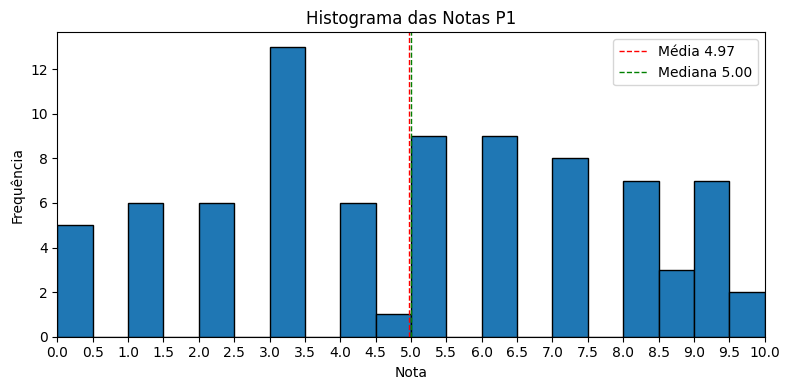

In [75]:
import numpy as np

# --- Histograma das notas com mais precisão e mais rótulos no eixo x ---
fig, ax = plt.subplots(figsize=(8, 4))
bins = 20  # Mais bins para maior precisão
ax.hist(p1_values, bins=bins, edgecolor="black")
ax.axvline(
    mean_p1, color="red", linestyle="--", linewidth=1, label=f"Média {mean_p1:.2f}"
)
ax.axvline(
    median_p1,
    color="green",
    linestyle="--",
    linewidth=1,
    label=f"Mediana {median_p1:.2f}",
)
ax.set_title("Histograma das Notas P1")
ax.set_xlabel("Nota")
ax.set_ylabel("Frequência")

# Mais rótulos no eixo x
xticks = np.arange(min_p1, max_p1 + 0.5, 0.5)
ax.set_xticks(xticks)
ax.set_xlim(min_p1, max_p1)
ax.legend()
plt.tight_layout()
plt.show()

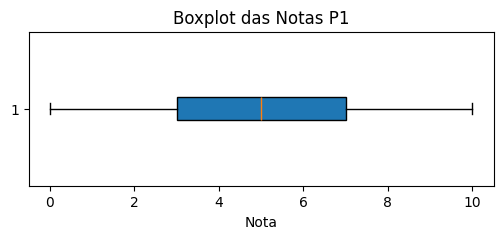

In [76]:
# --- Boxplot das notas ---
fig, ax = plt.subplots(figsize=(6, 2))
ax.boxplot(p1_values, vert=False, patch_artist=True)
ax.set_title("Boxplot das Notas P1")
ax.set_xlabel("Nota")
plt.show()